In [1]:
import numpy as np #general library, will come in handy later
import pandas as pd #another nice library for storing matrices, it rely's on numpy

import matplotlib.pyplot as plt #this library is for graphing things

from sklearn.linear_model import Lasso #These libraries have the necessary models
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

# Part a

This will help you get started looking at descriptive statistics for the data. I reccomend storing it in memory as a pandas dataframe

https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html

Some important points

* **Update**: `Balance` is the dependent variable
* You will need to create the interaction effects for the Lasso

In [2]:
#load data
df = pd.read_csv('credit.csv')

print df.mean()

Unnamed: 0     200.500000
Income          45.218885
Limit         4735.600000
Rating         354.940000
Cards            2.957500
Age             55.667500
Education       13.450000
Balance        520.015000
dtype: float64


**Update**: The following hint should help you set up the interaction effects. I have not created all of them, but this should demonstrate the general approach

In [3]:
#get the variable names in a list
column_names =  df.columns.values[1:-1] #select the columns we want
df_extended = df.copy() #make a copy to edit

for column in column_names:
    interaction_name = 'Limit*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['Limit']
    
print df_extended.mean()

Unnamed: 0         2.005000e+02
Income             4.521889e+01
Limit              4.735600e+03
Rating             3.549400e+02
Cards              2.957500e+00
Age                5.566750e+01
Education          1.345000e+01
Balance            5.200150e+02
Limit*Income       2.784145e+05
Limit*Limit        2.774037e+07
Limit*Rating       2.035984e+06
Limit*Cards        1.403784e+04
Limit*Age          2.676259e+05
Limit*Education    6.352438e+04
dtype: float64


# Part b

The following code shows you how to fit a Lasso to a hypothetical data set for more information you can refer to the documentation

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


In [4]:
#generate some fake data
nobs = 1000

#the first coefficient is much more important than the second
beta = np.array([10,1])
X = np.random.random((nobs , 2))
e = np.random.random(nobs )
y = 1 + np.dot(X, beta) + e

In [5]:
#fit the lasso to it, notice the second parameter is 0
#why do you think that is?
lasso = Lasso(alpha=.5) #note that alpha corresponds to lambda
lasso.fit(X, y)
print(lasso.coef_)
print(lasso.intercept_)

[3.76669335 0.        ]
5.1441185575393265


# Part c

The following function should help with this part

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

Alternatively, implementing MSE manually is not difficult

In [6]:
#prepare fitted data to compare using MSE function

fitted_y = lasso.predict(X)
print fitted_y.mean()

7.046503803174159


# Part d

For more on $k$-fold cross validation you can read the discussion on page 181 of the textbook

In [7]:
for i in range(5):
    #compute start/end of fold
    start_index = (nobs/5)*i
    end_index = (nobs/5)*(i+1)
    
    #partition data
    X_test =  X[start_index:end_index]
    y_test = y[start_index:end_index]
    
    X_train = np.concatenate( (X[0:start_index],X[end_index:]) )
    y_train = np.concatenate( (y[0:start_index],y[end_index:]) )
          
    #estimate model
    l = Lasso(alpha=.5)
    l.fit(X_train,y_train)
    print 'Fold %s, Coefficients: %s, Intercept: %s \n'%(i, l.coef_, l.intercept_)

#from here you can figure out CV_n

Fold 0, Coefficients: [3.92554736 0.        ], Intercept: 5.103875688340898 

Fold 1, Coefficients: [3.71021392 0.        ], Intercept: 5.158665265532849 

Fold 2, Coefficients: [3.6304335 0.       ], Intercept: 5.210976630798151 

Fold 3, Coefficients: [3.84895817 0.        ], Intercept: 5.083500052803934 

Fold 4, Coefficients: [3.70463609 0.        ], Intercept: 5.169849691721166 



# Part f

You can find more information about the Lasso with cross validation here

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

Remember, the assignment asks you to **manually** create the grid and search over $\lambda$, so this library is only for helping you check your answer

**Update**: Make sure to specify a value of `alphas` when checking your solution. If you do not, the value of $\lambda$ may be very large

In [8]:
#Specify a grid of lambda values to optimize over.
lambda_values = .1*np.array(range(1,5))

lass_cv = LassoCV(cv=5, alphas = lambda_values).fit(X, y)
lass_cv.fit(X, y)

#The lass gets as close as possible (given our grid)
print(lass_cv.coef_)
print(lass_cv.intercept_)
print(lass_cv.alpha_)

[8.81820539 0.        ]
2.5928299119107567
0.1


The routine below will help you construct your graph. Be aware that I am not doing any cross validation in this loop

[0.1 0.2 0.3 0.4]
[5.1441185575393265, 5.1441185575393265, 5.1441185575393265, 5.1441185575393265]


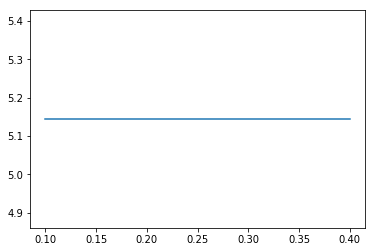

In [9]:
#iteratively fit model and create a graph
intercepts = []
lambda_values = .1*np.array(range(1,5))

print lambda_values

for lamb in lambda_values:
    l = Lasso(alpha=lamb)
    l.fit(X, y)
    intercepts.append(lasso.intercept_)
print intercepts
    
#graph result
plt.plot(lambda_values, intercepts)